# 第10回 クラスタリングその3: 続・様々なクラスタリング手法の紹介

いつものように右上の「Remix」ボタンを押して自分用の複製を作成すれば、各セルを「Shift+Enter」で実行しながら読むことができます

編集を行なった後は、Windowsでは「Ctrl+s」、Macでは「Cmd+s」で保存することができます

階層的クラスタリングに必要なパッケージをインストールし、読み込みます

In [1]:
# 階層的クラスタリングのためにClusteringパッケージをインストールする
using Pkg
Pkg.add("Clustering")

In [1]:
# 必要なパッケージを読み込む (数分かかるかもしれません、根気強く待ってください)
using CSV, Statistics
using LinearAlgebra: eigen
using Clustering: hclust, cutree
using Plots: scatter
using StatsPlots: plot

# フィッシャーのあやめの読み込み

フィッシャーのあやめをラベルなしデータとみなして使います。

アヤメの個体150サンプルについて、以下の4つの特徴量を計測して、その種(3種, setosa, versicolor, virginica)がラベル付けされているデータです。

1. SepalLength ガクの長さ (cm単位、説明変数)
2. SepalWidth ガクの太さ (cm単位、説明変数)
3. PetalLength 花弁の長さ (cm単位、説明変数)
4. PetalWidth 花弁の太さ (cm単位、説明変数)
5. Species 種類 (setosa, versicolor, virginica、ラベル・目的変数)

[iris.csv](https://nextjournal.com/data/QmP6fvLv5D5ozPEcbK1vxmbBua2cVZGs7paMudgjhJox5U?content-type=text/csv&node-id=225cf9f6-7b36-4094-b01f-3e9f5cc8effd&filename=iris.csv&node-kind=file)

![iris.png](https://nextjournal.com/data/QmcsTUT7gawLt7FGkvJhLYSug8S6Zi8t4DcfkchqF3dzR9?content-type=image/png&node-id=3bec709d-9546-4a83-a91f-b2cc9f92c85c&filename=iris.png&node-kind=file)


In [1]:
# CSVデータの読み込み
iris = CSV.read("/.nextjournal/data-named/QmP6fvLv5D5ozPEcbK1vxmbBua2cVZGs7paMudgjhJox5U/iris.csv")

In [1]:
# xの中心化(平均を引いておく前処理)を行う
X = Array(iris[:, 2:5])
X .= X .- mean(X, dims=1)

150×4 Array{Float64,2}:
 -0.743333    0.446  -2.35867  -0.998667
 -0.943333   -0.054  -2.35867  -0.998667
 -1.14333     0.146  -2.45867  -0.998667
 -1.24333     0.046  -2.25867  -0.998667
 -0.843333    0.546  -2.35867  -0.998667
 -0.443333    0.846  -2.05867  -0.798667
 -1.24333     0.346  -2.35867  -0.898667
 -0.843333    0.346  -2.25867  -0.998667
 -1.44333    -0.154  -2.35867  -0.998667
 -0.943333    0.046  -2.25867  -1.09867
  ⋮                            
  1.05667     0.046   1.34133   1.10133
 -0.0433333  -0.354   1.34133   0.701333
  0.956667    0.146   2.14133   1.10133
  0.856667    0.246   1.94133   1.30133
  0.856667   -0.054   1.44133   1.10133
  0.456667   -0.554   1.24133   0.701333
  0.656667   -0.054   1.44133   0.801333
  0.356667    0.346   1.64133   1.10133
  0.0566667  -0.054   1.34133   0.601333

# 階層的クラスタリング

In [1]:
# 距離行列dを計算する (ユークリッド距離を使用)
N = size(X, 1)
d = zeros(Float64, N, N)

for n1 = 1:N
  for n2 = 1:N
    d[n1, n2] = sqrt(sum((X[n1, :] .- X[n2, :]).^2))
  end
end

In [1]:
# Ward法で階層的クラスタリングを行う
r = hclust(d, linkage=:ward)
#r = hclust(d, linkage=:average)
#r = hclust(d, linkage=:complete)
#r = hclust(d, linkage=:single)

Hclust{Float64}([-10 -35; -38 1; … ; 146 147; 145 148], [0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.141421, 0.141421, 0.141421  …  1.86838, 1.91608, 2.05363, 2.81394, 2.86942, 3.87584, 4.84771, 6.39941, 12.3004, 32.428], [36, 46, 2, 13, 26, 38, 10, 35, 7, 4  …  98, 62, 72, 150, 71, 128, 139, 86, 52, 57], :ward)

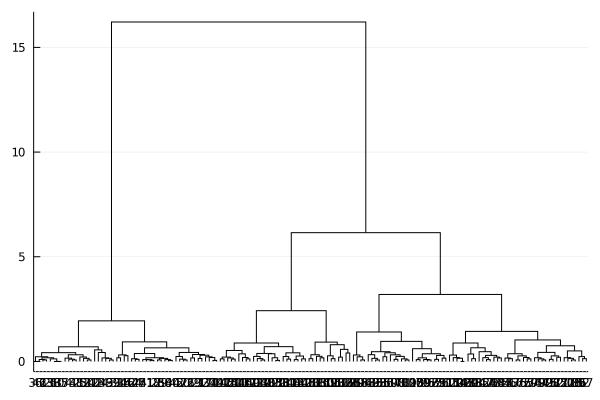

In [1]:
# 樹形図をプロット
plot(r)

In [1]:
# クラスタ数=3のところの分類結果を取り出す
c = cutree(r, k=3)

150-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 2
 3
 3
 3
 2
 3
 3
 2

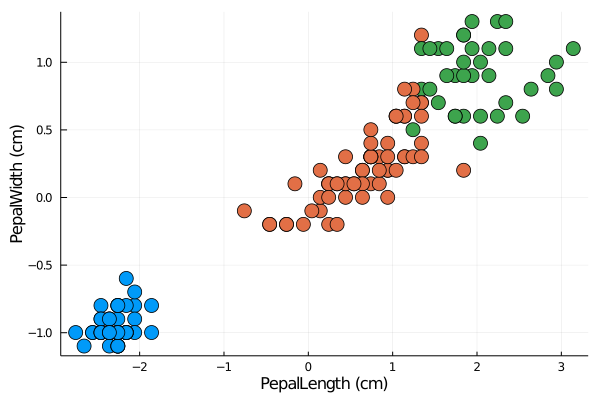

In [1]:
# クラスタ数=3の散布図をプロット
scatter(X[:, 3], X[:, 4], xlabel="PepalLength (cm)", ylabel="PepalWidth (cm)", markersize=8, c=c, legend=:false)

# 主成分分析

In [1]:
# 共分散行列を対角化してベクトルwを求める。固有値の大きな順に並べ替える
e = eigen(X' * X ./ N)
lambda = e.values[end:-1:1]
W = e.vectors[:, end:-1:1]

4×4 Array{Float64,2}:
 -0.36159     0.65654    -0.580997    0.317255
  0.0822689   0.729712    0.596418   -0.324094
 -0.856572   -0.175767    0.0725241  -0.479719
 -0.358844   -0.0747065   0.549061    0.751121

In [1]:
# 射影して主成分を得る
P = X * W

150×4 Array{Float64,2}:
  2.68421   0.326607   -0.0215118   0.00100616
  2.71539  -0.169557   -0.203521    0.0996024
  2.88982  -0.137346    0.0247092   0.0193045
  2.74644  -0.311124    0.037672   -0.0759553
  2.72859   0.333925    0.0962297  -0.0631287
  2.2799    0.747783    0.174326   -0.0271468
  2.82089  -0.0821045   0.264251   -0.0500996
  2.62648   0.170405   -0.0158015  -0.0462818
  2.88796  -0.570798    0.0273354  -0.0266154
  2.67384  -0.106692   -0.191533   -0.055891
  ⋮                                
 -1.92245   0.409271    0.115493    0.504095
 -1.41407  -0.574925    0.296398   -0.0156955
 -2.56332   0.275975    0.291254    0.0561849
 -2.41939   0.303504    0.504303    0.238218
 -1.94402   0.187415    0.179303    0.425082
 -1.52566  -0.375021   -0.120636    0.255723
 -1.76405   0.0785192   0.130784    0.136295
 -1.90163   0.115877    0.722874    0.0408728
 -1.38967  -0.282887    0.362318   -0.15631

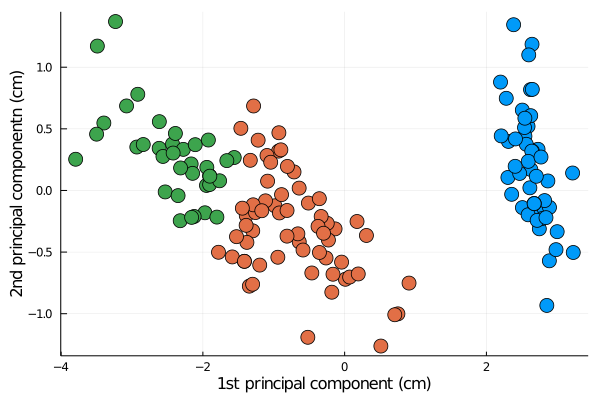

In [1]:
# 第1主成分と第2主成分で散布図をプロット
scatter(P[:, 1], P[:, 2], xlabel="1st principal component (cm)", ylabel="2nd principal componentn (cm)", markersize=8, c=c, legend=:false)

In [1]:
# 寄与率の計算
cumsum(lambda) ./ sum(lambda)

4-element Array{Float64,1}:
 0.924616
 0.977632
 0.994817
 1.0

# やってみよう

上の主成分で求めた固有値が、確かに主成分の分散になっているか確認してみましょう。

In [1]:
# 固有値λの確認
# lambda

In [1]:
# 主成分の分散の確認
# var(P, dims=1, corrected=false)